# Exploratory Data Analysis (EDA) and Data Cleaning for Professor Basic Info Data (profs)

## Setup

In [1]:
# import modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotnine as p9

In [2]:
# read in data
profs = pd.read_csv("profs.csv")

## EDA

In [3]:
# view head and tail of data
profs

,Unnamed: 0,__typename,firstName,lastName,department,id,legacyId,numRatings,avgRating,avgDifficulty
0,0,Teacher,Robert,Borgen,Languages,VGVhY2hlci05NTY2,9566,39,3.3,2.9
1,1,Teacher,Aram,Yengoyan,Anthropology,VGVhY2hlci05NTY4,9568,47,2.6,2.7
2,2,Teacher,Patrick,Carroll-Burke,Social Science,VGVhY2hlci05NTcw,9570,13,3.2,3.1
3,3,Teacher,Henry,McHenry,Anthropology,VGVhY2hlci0xMzQ4MQ==,13481,124,4.5,2.5
4,4,Teacher,Peter,Rodman,Anthropology,VGVhY2hlci0yMjIzMA==,22230,73,3.8,3.6
...,...,...,...,...,...,...,...,...,...,...
3932,4466,Teacher,Chris,Nitta,Computer Science,VGVhY2hlci00NjU5MTM=,465913,189,2.3,4.3
3933,4467,Teacher,Daryl,Posnett,Computer Science,VGVhY2hlci0yNTA5NTcy,2509572,57,2.0,4.7
3934,4468,Teacher,Daniel,Ferenc,Science,VGVhY2hlci0xMjUyNjg=,125268,29,1.6,3.7
3935,4469,Teacher,Kenneth,Hilt,Biology,VGVhY2hlci0xNTE4OTQ=,151894,325,3.7,4.0


### Mean number of ratings for each professor

In [4]:
# mean number of ratings
profs['numRatings'].mean()

21.41529083058166

### Distribution of number of ratings for each professor

Text(0, 0.5, 'Number of Ratings')

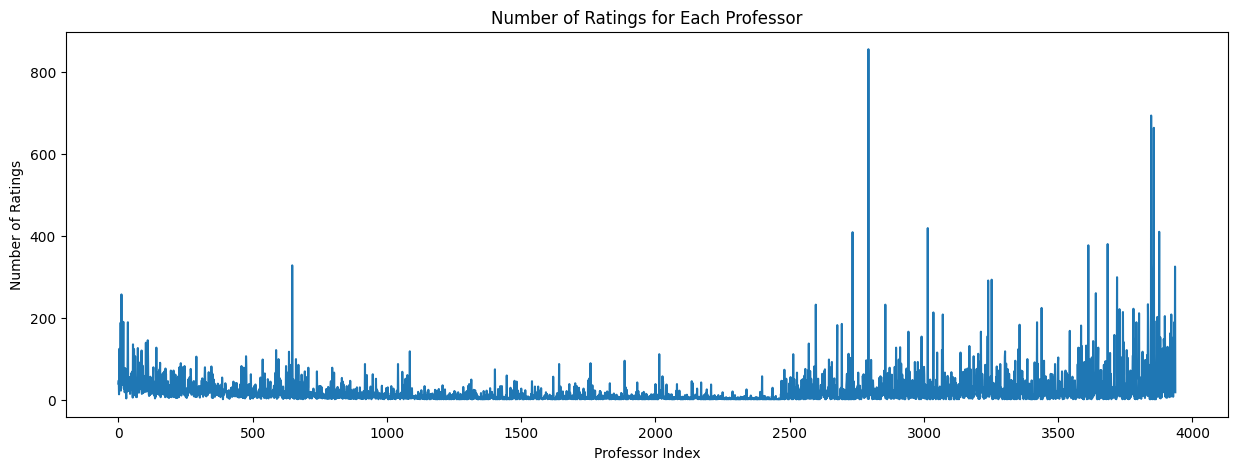

In [26]:
# quick plot of ratings
plt.figure(figsize=(15,5))
profs['numRatings'].plot()
plt.title('Number of Ratings for Each Professor')
plt.xlabel('Professor Index')
plt.ylabel('Number of Ratings')


### Who has the most ratings?

In [6]:
# prof with most ratings
profs.loc[profs['numRatings'].idxmax()]

Unnamed: 0                       3215
__typename                    Teacher
firstName                     Andreas
lastName                   Toupadakis
department                  Chemistry
id               VGVhY2hlci01NjE1OTk=
legacyId                       561599
numRatings                        856
avgRating                         3.3
avgDifficulty                     3.1
Name: 2793, dtype: object

### Histograms of Quality Rating and Difficulty Rating

Text(0.5, 1.0, 'Histogram of Average Professor Quality Rating')

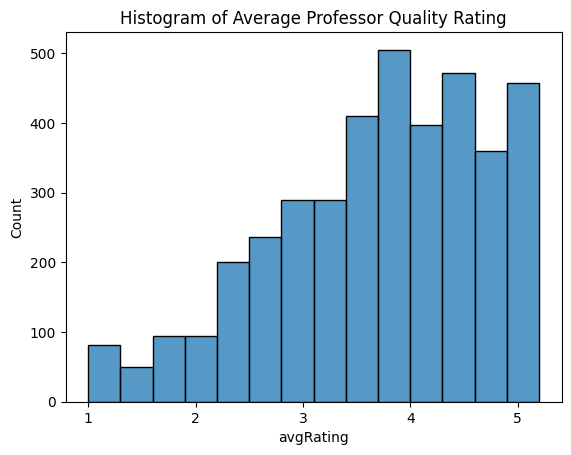

In [45]:
# histogram of average rating
sns.histplot(profs['avgRating'], binwidth=0.3)
plt.title("Histogram of Average Professor Quality Rating")

Text(0.5, 1.0, 'Histogram of Average Professor Difficulty Rating')

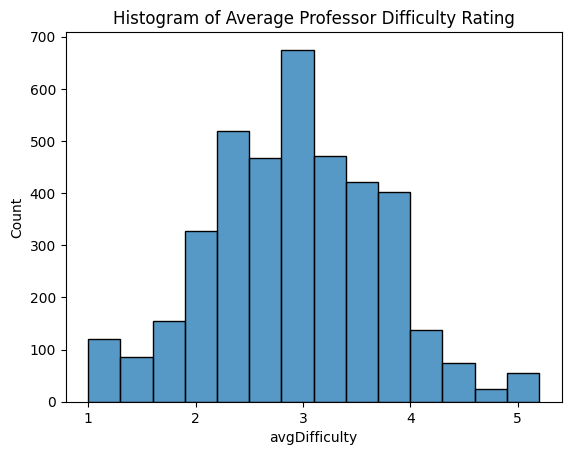

In [46]:
# histogram of average difficulty rating
sns.histplot(profs['avgDifficulty'], binwidth=0.3)
plt.title("Histogram of Average Professor Difficulty Rating")

### Relationship between Average Difficulty Rating and Average Quality Rating

Text(0.5, 0, 'Mean Difficulty')

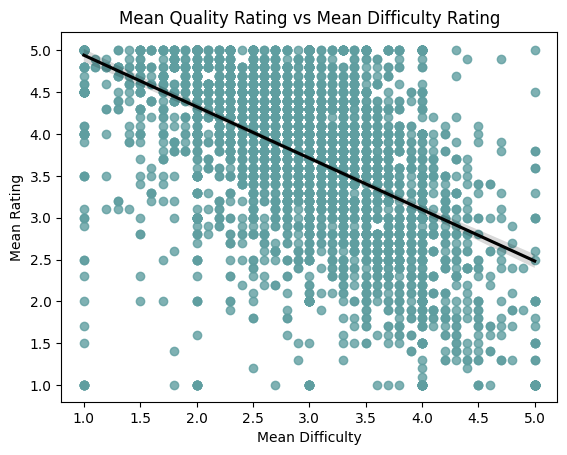

In [66]:
# scatterplot rating vs difficulty
sns.regplot(profs, x=profs['avgDifficulty'], y=profs['avgRating'],
            scatter_kws={"color": "cadetblue"},
            line_kws={"color": "black"})
plt.title("Mean Quality Rating vs Mean Difficulty Rating")
plt.ylabel("Mean Rating")
plt.xlabel("Mean Difficulty")

In [10]:
# correlation
corr = profs['avgRating'].corr(profs['avgDifficulty'])
print("Correlation between average rating and average dificulty is: ", corr)

Correlation between average rating and average dificulty is:  -0.513526981552611


### Quality Rankings, Difficulty Rankings, and Number of Reviews by Department

#### Quality

In [108]:
# group by department, aggregate avgRating by mean, numRatings by sum
rating_by_dept = profs.groupby('department', as_index = False).agg({'avgRating': 'mean', 'numRatings': 'sum'})

# round ratings
rating_by_dept['avgRating'] = rating_by_dept['avgRating'].round(decimals=2)

# sort by rating (descending)
rating_by_dept = rating_by_dept.sort_values(by='avgRating', ascending=False)

# reset index
rating_by_dept = rating_by_dept.reset_index(drop=True)

# view head, tail of dataframe
rating_by_dept

,department,avgRating,numRatings
0,Landscape Architecture amp Regional Planning,5.00,1
1,Landscape Architecture Regional Planning,5.00,2
2,Cell Biology & Neuroanatomy,5.00,13
3,Food Science amp Technology,5.00,3
4,Student Services,5.00,1
...,...,...,...
147,Agricultural & Resource Economics,2.96,218
148,Managerial Science,2.80,43
149,Business,2.78,29
150,Agricultural Engineering,2.75,15


Text(0.5, 0, 'Mean Quality Rating')

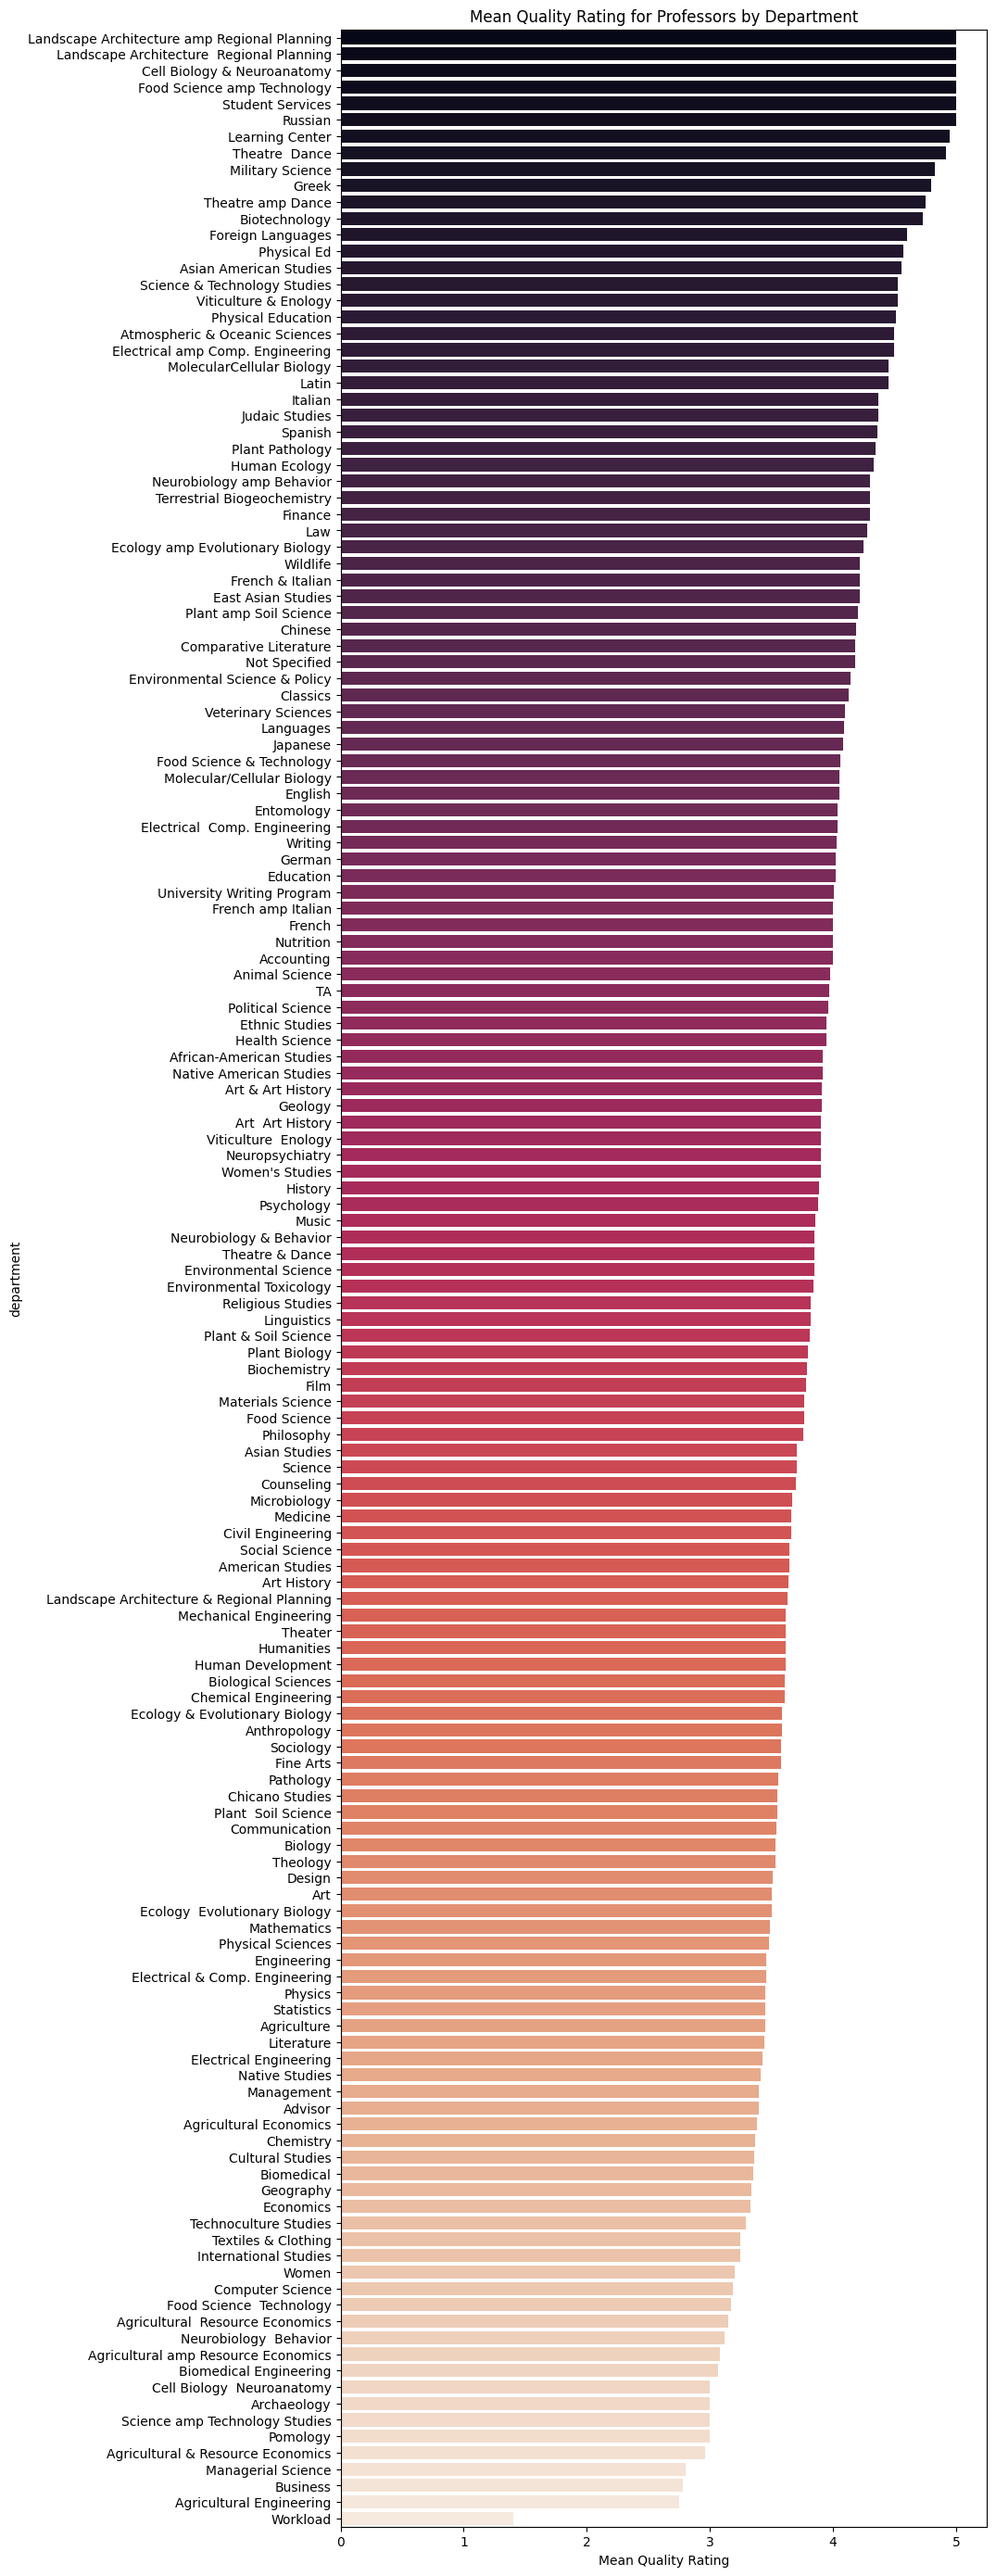

In [79]:
# rating by dept barplot
plt.figure(figsize=(9,35))
sns.barplot(rating_by_dept, y=rating_by_dept['department'], x=rating_by_dept['avgRating'],
            palette="rocket")
plt.title("Mean Quality Rating for Professors by Department")
plt.xlabel("Mean Quality Rating")

Notes: 

* we have some cleaning to do with regards to department names. For example, we have: Art & Art History, Art Art History, Art History and Art all listed as separate departments.

* the number one and two departments have very few ratings because they are typos of a dept much lower on the list. this should be dealt with to produce a more realistic ranking

* what is "Workload", "TA", "Advisor" ? Sounds like user error when inputting department names.

In [13]:
# count number of unique departments
rating_by_dept['department'].nunique()


152

In [109]:
# inspect "Workload" department
rating_by_dept.loc[rating_by_dept['department'] == 'Workload']

,department,avgRating,numRatings
151,Workload,1.4,23


Strange that is a lot of ratings to be an error.

In [110]:
# inspect "TA" department
rating_by_dept.loc[rating_by_dept['department'] == 'TA']

,department,avgRating,numRatings
58,TA,3.97,65


65 ratings. Perhaps the user didn't know which department to put and the class was taught by a grad student TA? Or TA is an acronym?

In [111]:
# inspect "Advisor" department
rating_by_dept.loc[rating_by_dept['department'] == 'Advisor']

,department,avgRating,numRatings
126,Advisor,3.4,22


I suspect that for TA and Advisor, users are rating TA's and Advisors as if they are their own departments. Will need to inspect the webpages to confirm.

#### Where does the statistics department lie in quality rankings?

In [117]:
# view statistics department ranking/average
statsRating = rating_by_dept.loc[rating_by_dept['department'] == 'Statistics']
statsRating = statsRating.reset_index()
print(f"The statistics department is ranked {statsRating.iloc[0]['index']} out of {len(rating_by_dept)} departments with a mean professor quality rating of {statsRating.iloc[0]['avgRating']} and a\
 total of {statsRating.iloc[0]['numRatings']} reviews given.")

The statistics department is ranked 120 out of 152 departments with a mean professor quality rating of 3.45 and a total of 2163 reviews given.


### Difficulty

In [114]:
# group by department, aggregate avgDifficulty by mean, numRatings by sum
diff_by_dept = profs.groupby('department', as_index = False).agg({'avgDifficulty': 'mean', 'numRatings': 'sum'})

# round difficulty ratings
diff_by_dept['avgDifficulty'] = diff_by_dept['avgDifficulty'].round(decimals=2)

# sort by difficulty rating (descending)
diff_by_dept = diff_by_dept.sort_values(by='avgDifficulty', ascending=False)

# reset index
diff_by_dept = diff_by_dept.reset_index(drop=True)

# view head, tail of dataframe
diff_by_dept

,department,avgDifficulty,numRatings
0,Workload,4.60,23
1,Cell Biology Neuroanatomy,4.25,4
2,Managerial Science,4.00,43
3,Pomology,4.00,1
4,Agricultural amp Resource Economics,3.90,28
...,...,...,...
147,Learning Center,1.90,95
148,Physical Ed,1.82,199
149,Military Science,1.67,4
150,Physical Education,1.59,62


Text(0.5, 0, 'Mean Difficulty Rating')

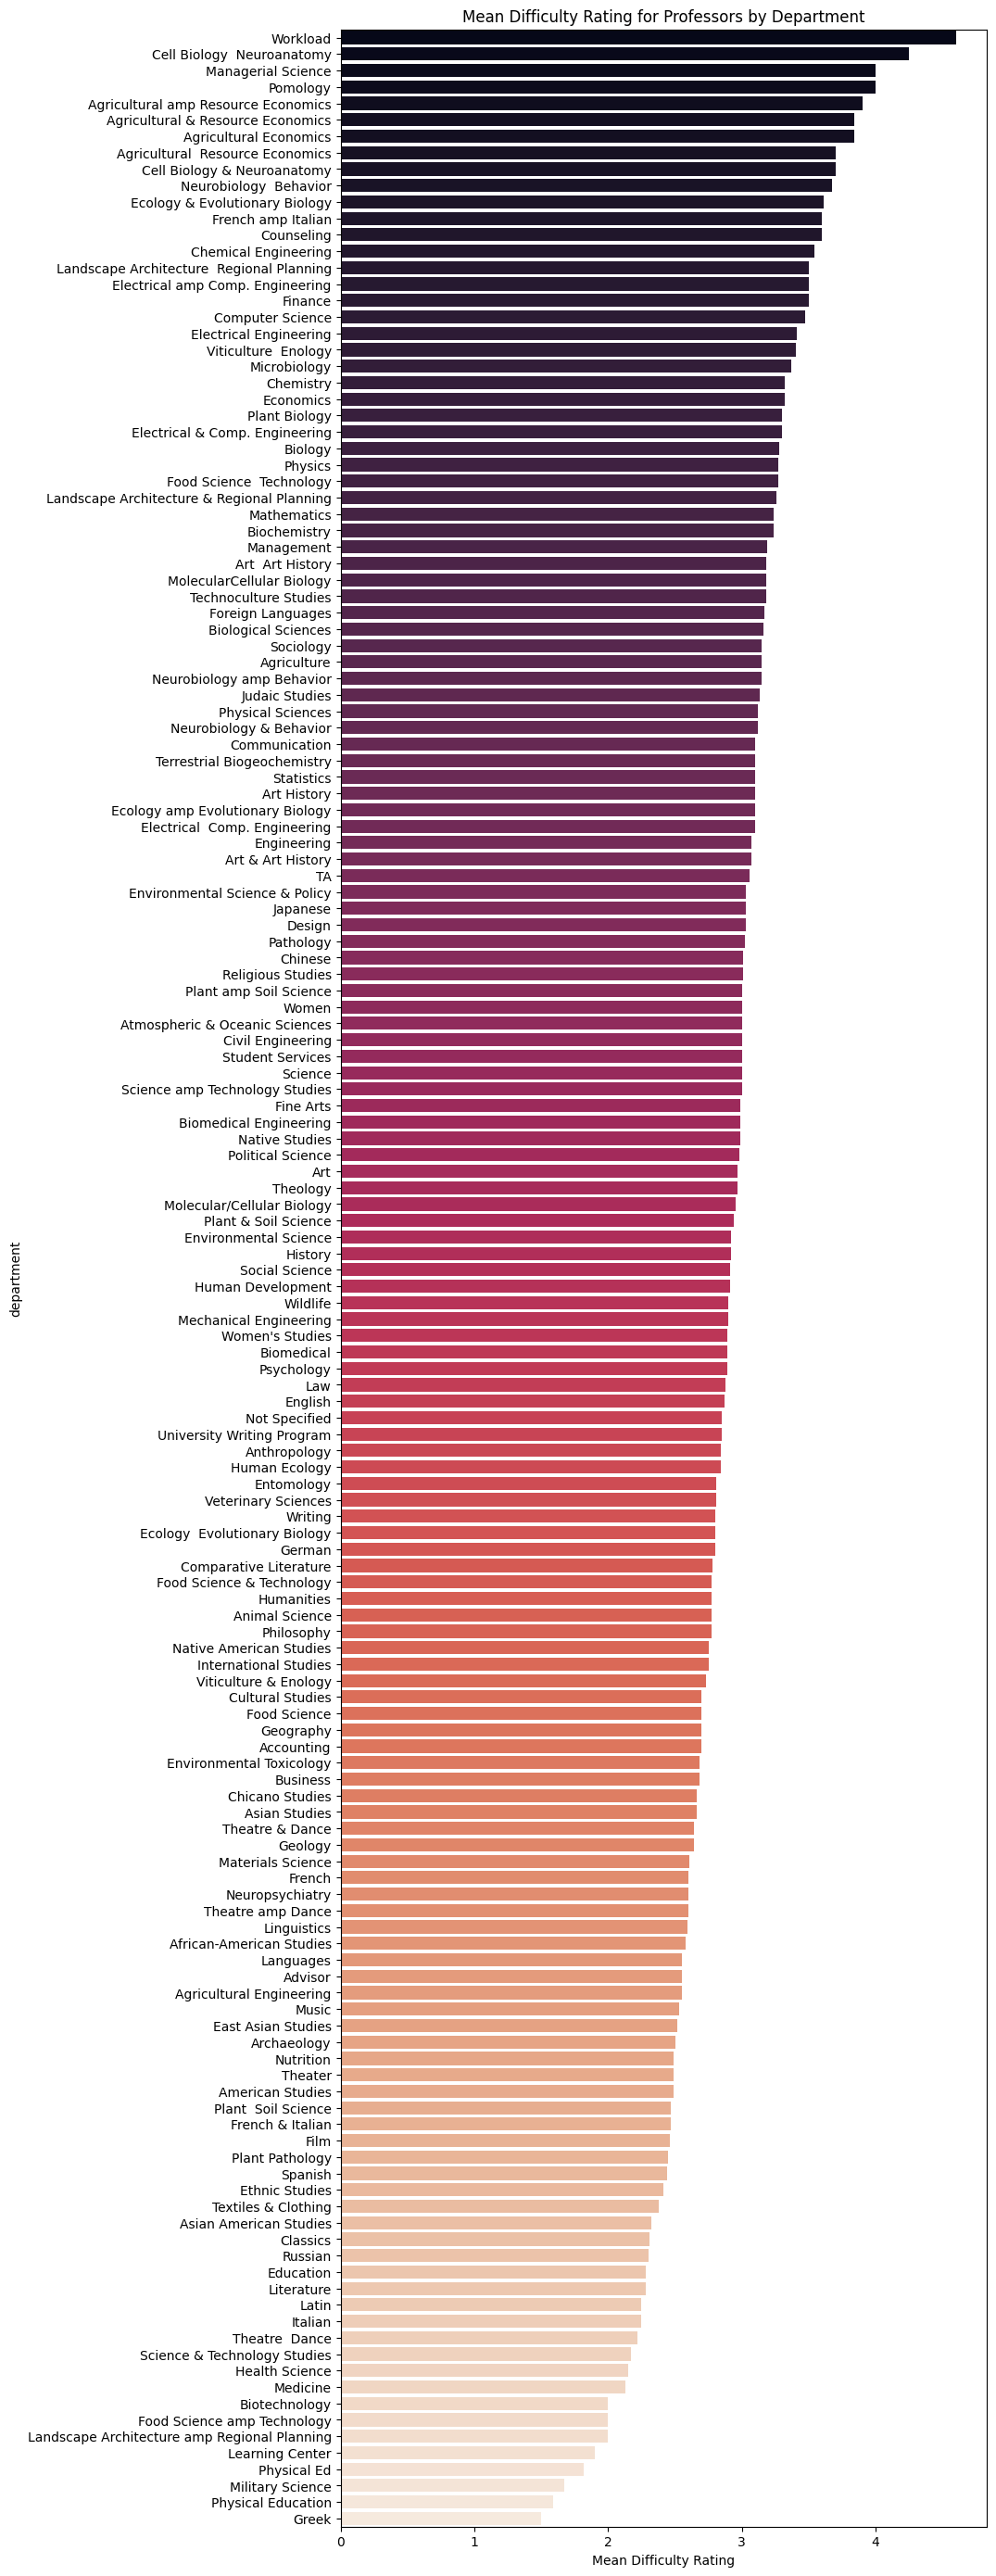

In [115]:
# difficulty by dept barplot
plt.figure(figsize=(9,35))
sns.barplot(diff_by_dept, y=diff_by_dept['department'], x=diff_by_dept['avgDifficulty'],
            palette="rocket")
plt.title("Mean Difficulty Rating for Professors by Department")
plt.xlabel("Mean Difficulty Rating")

Notes:

* same issues as quality plot above. need to combine repeats and investigate nonsense.

* greek was very high in quality but is at the bottom of difficulty

#### Where does the statistics department lie in difficulty rankings?

In [116]:
# view statistics department ranking/average
statsDiff = diff_by_dept.loc[diff_by_dept['department'] == 'Statistics']
statsDiff = statsDiff.reset_index()
print(f"The statistics department is ranked {statsDiff.iloc[0]['index']} out of {len(diff_by_dept)} departments with a mean professor difficulty rating of {statsDiff.iloc[0]['avgDifficulty']} and a\
 total of {statsDiff.iloc[0]['numRatings']} reviews given.")

The statistics department is ranked 45 out of 152 departments with a mean professor difficulty rating of 3.1 and a total of 2163 reviews given.


#### Number of Ratings

In [123]:
# numRatings dataframe
num_by_dept = diff_by_dept[['department', 'numRatings']].sort_values(by='numRatings', ascending=False)
num_by_dept

,department,numRatings
29,Mathematics,9293
21,Chemistry,7715
83,English,4367
81,Psychology,4288
22,Economics,4052
...,...,...
14,Landscape Architecture Regional Planning,2
146,Landscape Architecture amp Regional Planning,1
64,Science amp Technology Studies,1
3,Pomology,1


Text(0.5, 0, 'Number of Ratings')

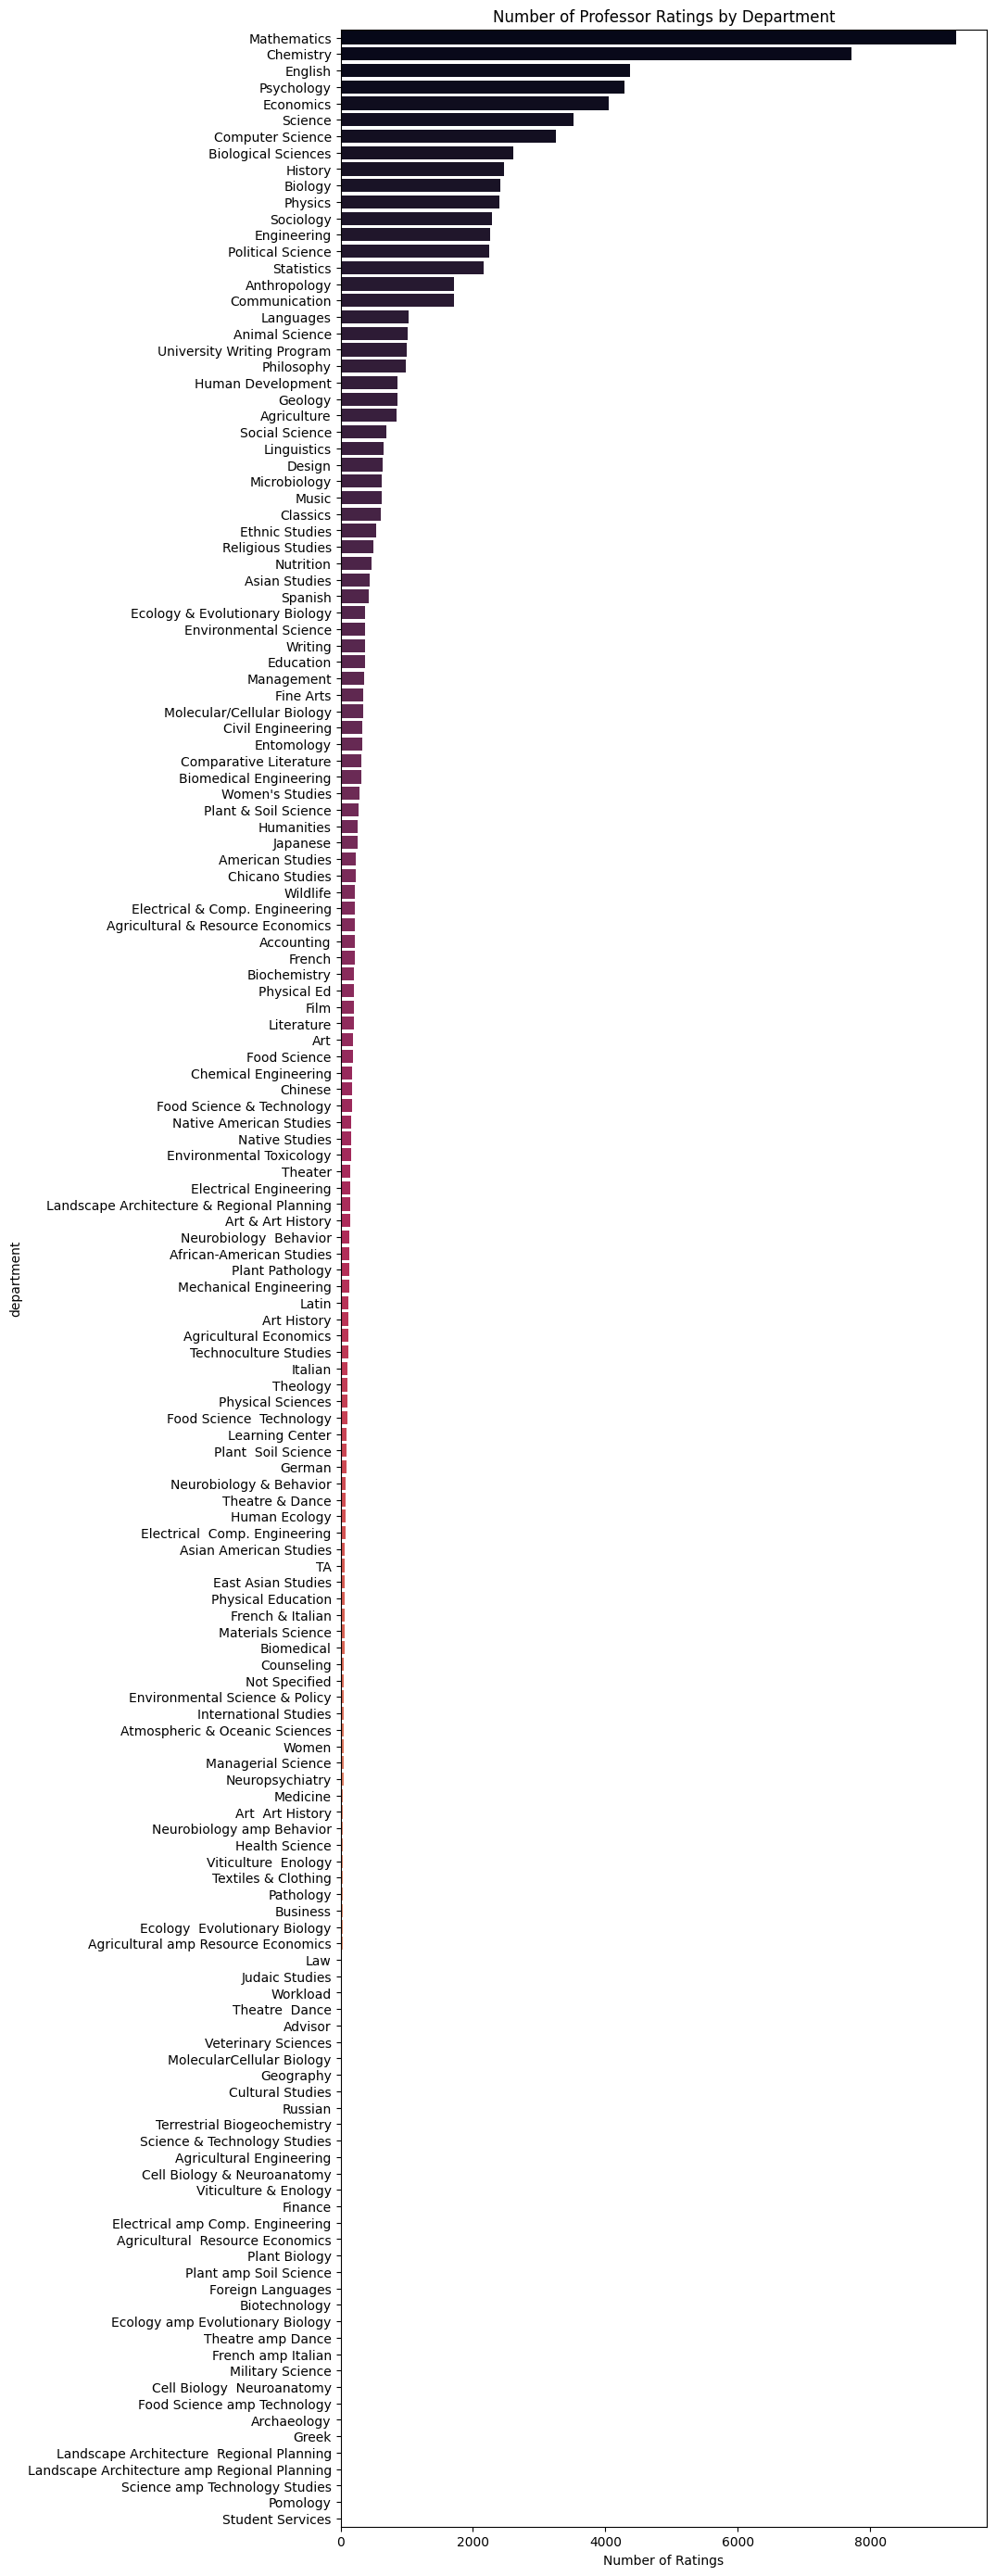

In [124]:
# number of ratings by dept barplot
plt.figure(figsize=(9,35))
sns.barplot(num_by_dept, y=num_by_dept['department'], x=num_by_dept['numRatings'],
            palette="rocket")
plt.title("Number of Professor Ratings by Department")
plt.xlabel("Number of Ratings")

Notes:

* many of the departments high in quality ranking are low in number of review ranking. e.g. Greek, Cell Biology Neuroanatomy

* math and chem have way more ratings than most!

* Science has a lot of reviews, but this is a vague term that doesn't describe an actual department

## Cleaning

Many of the repeated departments happen where there is the word 'and' or an ampersand '&'.

In [128]:
## find all departments that contain an '&'
set(profs[profs['department'].str.contains('&')]['department'])

{'Agricultural & Resource Economics',
 'Art & Art History',
 'Atmospheric & Oceanic Sciences',
 'Cell Biology & Neuroanatomy',
 'Ecology & Evolutionary Biology',
 'Electrical & Comp. Engineering',
 'Environmental Science & Policy',
 'Food Science & Technology',
 'French & Italian',
 'Landscape Architecture & Regional Planning',
 'Neurobiology & Behavior',
 'Plant & Soil Science',
 'Science & Technology Studies',
 'Textiles & Clothing',
 'Theatre & Dance',
 'Viticulture & Enology'}

In [139]:
# compare to all departments that contain two spaces
set(profs[profs['department'].str.contains('  ')]['department'])

{'Agricultural  Resource Economics',
 'Art  Art History',
 'Cell Biology  Neuroanatomy',
 'Ecology  Evolutionary Biology',
 'Electrical  Comp. Engineering',
 'Food Science  Technology',
 'Landscape Architecture  Regional Planning',
 'Neurobiology  Behavior',
 'Plant  Soil Science',
 'Theatre  Dance',
 'Viticulture  Enology'}

In [145]:
# indexes for every row where 'department' contains two spaces
amp_ids = profs[profs['department'].str.contains('  ')].index

In [ ]:
# replace missing ampersands
for i in amp_ids:
    profs['department'][i] = profs['department'][i].replace('  ', ' & ')

Some of the ampersands have been turned into 'amp'.

In [149]:
## find all departments that contain 'amp'
set(profs[profs['department'].str.contains('amp')]['department'])

{'Agricultural amp Resource Economics',
 'Ecology amp Evolutionary Biology',
 'Electrical amp Comp. Engineering',
 'Food Science amp Technology',
 'French amp Italian',
 'Landscape Architecture amp Regional Planning',
 'Neurobiology amp Behavior',
 'Plant amp Soil Science',
 'Science amp Technology Studies',
 'Theatre amp Dance'}

In [150]:
# indexes for every row where 'department' contains two spaces
amp_ids2 = profs[profs['department'].str.contains('amp')].index

In [ ]:
# replace missing ampersands where 'amp'
for i in amp_ids2:
    profs['department'][i] = profs['department'][i].replace('amp', '&')

We'll remove the departments that aren't real departments.

In [153]:
# departments to be removed
nonsense_depts = ['TA', 'Workload', 'Advisor', 'Student Services']

In [174]:
# loop to remove nonsense departments
for i in range(0, len(nonsense_depts)):
    profs = profs[profs['department'] != nonsense_depts[i]]

__We can now conduct our analysis again with the cleaned data__

# EDA PART 2